In [1]:
import json;
from matplotlib import pyplot as plt
import math;
import numpy as np;

In [2]:
def getJsonResult(file):
    f = open(file,'r');
    data = json.load(f);
    f.close();
    return data

In [3]:
# Graph-5: Count/min graph for all brands
def drawGraphCoutPerMin(resultJson,brandsKey,framePerMin=60):
    totalFrames=len(resultJson);
    xAxisCount= math.ceil((totalFrames*1.0)/framePerMin)+1;
    print("totalFrames:"+str(totalFrames)+" xAxisCount:"+str(xAxisCount));
    xAxis = np.arange(0,xAxisCount);
    yAxis = dict();
    xAxisItr=0;
    frameItr=0;
    for bk in brandsKey:
        yAxis[bk]=np.zeros(xAxisCount);
    pass;
    for fkey in resultJson:
        for bk in brandsKey:
            yAxis[bk][xAxisItr]+=len(resultJson[fkey][bk]);
        pass;
        frameItr+=1;
        if frameItr%framePerMin == 0:
            xAxisItr+=1;
        pass;
    pass;
    # Draw graph
    plt.xlabel("minute");
    plt.ylabel("count");
    plt.title(' Brand count w.r.t time');
    for bk in brandsKey:
        plt.plot(xAxis,yAxis[bk]);
    pass;
    plt.legend(brandsKey);
    return yAxis;
    pass;

In [4]:
# Graph-1: Total time a brand came
def drawGrapBrandCount(resultJson,brandsKey):
    totalFrames=len(resultJson);
    xAxisCount= len(brandsKey);
    xAxis = np.arange(0,xAxisCount);
    yAxis = dict();
    for bk in brandsKey:
        yAxis[bk]=0;
    pass;
    for fkey in resultJson:
        for bk in brandsKey:
            yAxis[bk]+=len(resultJson[fkey][bk]);
        pass;
    pass;
    print(yAxis);
    # Draw graph
    plt.xlabel("brand");
    plt.ylabel("count");
    plt.title('Brand Count');
    plt.bar(range(len(yAxis)), list(yAxis.values()), align='center')
    plt.xticks(range(len(yAxis)), list(yAxis.keys()))
    return yAxis;
    pass;

In [13]:
# Graph-1: Total time a brand came
def drawGraphHeatMap(resultJson,brandsKey,dim):
    totalFrames=len(resultJson);
    width=dim[0];
    height=dim[1];
    heatmaps = dict();
    for bk in brandsKey:
        heatmaps[bk]=np.zeros((width,height));
    pass;
    for fkey in resultJson:
        for bk in brandsKey:
            hm=heatmaps[bk]
            ls = resultJson[fkey][bk];
            for r in ls:
                x1=r[0];
                x2=r[2];
                y1=r[1];
                y2=r[3];
                #print("Key: "+bk+" x1:"+str(x1)+" y1:"+str(y1)+" x2:"+str(x2)+" y2:"+str(y2));
                hm[x1:x2+1,y1:y2+1] += 1
            pass;
        pass;
    pass;
    print(heatmaps[brandsKey[0]]);
    print("max",np.amax(heatmaps[brandsKey[0]]));
    # Draw graph
    img=heatmaps[brandsKey[0]];
    plt.imshow(img,cmap="hot");
    plt.colorbar()
    return heatmaps;
    pass;

In [6]:
basePath = './result';
resultFile = basePath +'/model_result_1.json';
jsonResult= getJsonResult(resultFile);
jsonResult['/content/drive/My Drive/BattleofBrands/Dataset/data/frame40.jpg']

{'paytm': [], 'cred': [], 'unacademy': [], 'altroz': [], 'dream11': []}

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [2. 2. 2. ... 0. 0. 0.]
 [2. 2. 2. ... 0. 0. 0.]
 [2. 2. 2. ... 0. 0. 0.]]
max 25.0


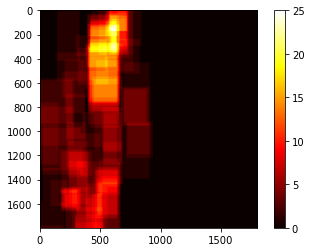

In [14]:
frames=len(jsonResult);
brandsKey=['paytm','cred','unacademy','altroz','dream11'];
#g1Result=drawGraphCoutPerMin(jsonResult,brandsKey,3);
#drawGrapBrandCount(jsonResult,brandsKey);
heatmaps=drawGraphHeatMap(jsonResult,brandsKey,[1800,1800]);

In [35]:
img=np.array([[1,2,3,4,5],[6,7,8,9,10]])
x,y = np.where((img>7) & (img<=9));
print(x)
print(y)
img[x,y]=0;
img

[1 1]
[2 3]


array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  0,  0, 10]])